In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
l=pd.read_csv('iris.csv')

In [3]:
l

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
l.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
x = l.iloc[:, 0:4]
y = l.iloc[:,[4]]


In [12]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)
x_train

,sepal_length,sepal_width,petal_length,petal_width
126,6.2,2.8,4.8,1.8
61,5.9,3.0,4.2,1.5
124,6.7,3.3,5.7,2.1
117,7.7,3.8,6.7,2.2
20,5.4,3.4,1.7,0.2
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


In [15]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
DT=DecisionTreeClassifier(criterion="entropy",)

# Train Decision Tree Classifer
DT.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = DT.predict(x_test)
y_pred

array(['versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [17]:
DT.get_depth()

5

In [19]:
c=x.columns
c

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [20]:
pd.DataFrame(DT.feature_importances_,index=c)

,0
sepal_length,0.044746
sepal_width,0.016148
petal_length,0.579524
petal_width,0.359582


In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9333333333333333


In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.94      0.91        16
   virginica       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

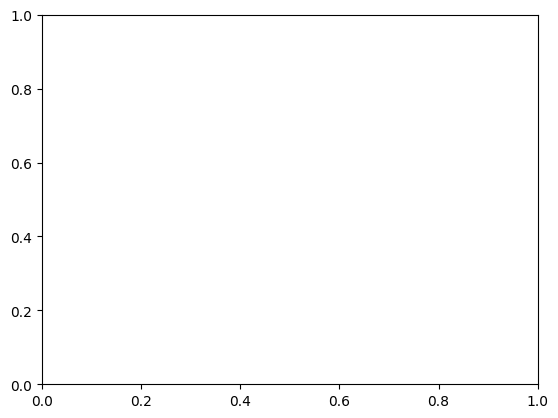

In [29]:
plt.scatter(x, y, alpha=0.5,data=l)
plt.show()

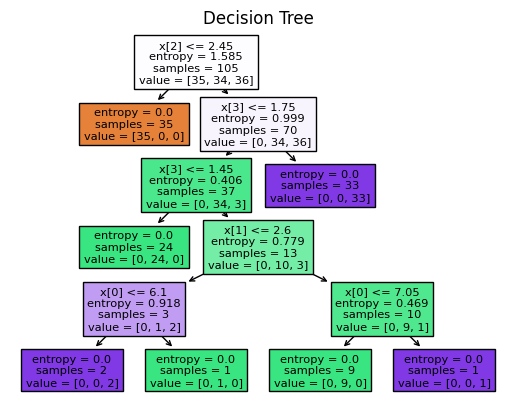

In [33]:
from sklearn.tree import plot_tree
#plt.figure(figsize=(20, 10))
plot_tree(DT, filled=True)
plt.title("Decision Tree")
plt.show()